In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

In [2]:

data = pd.read_excel("assignment2data.xls")

ratings_to_drop = ["NR", "UNDEF", "Aa2;MIG1", "MIG1"]

bool_array = data["Underlying Moodys Rating"].isin(ratings_to_drop)

data = data.drop(index=data[bool_array].index)

ratings = [
    (data["Underlying Moodys Rating"] == "Aaa"), 
    (data["Underlying Moodys Rating"] == "Aa1"),
    (data["Underlying Moodys Rating"] == "Aa2"),
    (data["Underlying Moodys Rating"] == "Aa3"),
    (data["Underlying Moodys Rating"] == "A1"), 
    (data["Underlying Moodys Rating"] == "A2"), 
    (data["Underlying Moodys Rating"] == "A3"), 
    (data["Underlying Moodys Rating"] == "Baa1"), 
    (data["Underlying Moodys Rating"] == "Baa2"), 
    (data["Underlying Moodys Rating"] == "Baa3"), 
    (data["Underlying Moodys Rating"] == "Ba1"), 
    (data["Underlying Moodys Rating"] == "Ba2"), 
    (data["Underlying Moodys Rating"] == "Ba3"), 
]

values = range(12, -1, -1)

data["moodys_ratings_num"] = np.select(ratings, values)

data = data.drop(
    ["Underlying S & P Rating", 
     "Underlying Fitch Rating",
     "Undesignated Unreserved Fund Balance (GF)", 
     "Current Liabilities (Gov)", 
     "Total OPEB Liability (EOY)", 
     "Total OPEB Expense"], 
     axis=1
     )

data = data.dropna(axis=0)

In [3]:
data.describe()

,sale_year,Cash & Short-Term Investments (GF),Deferred Rev (GF),Total Liabilities (GF),Unassigned Fund Balance (GF),Total Fund Balance (GF),General Fund Rev,General Fund Exp,Total Taxable Assessed Value,Total Assessed Value,Current Debt Service (all Gov funds),Current Portion GO Debt (Gov),Current Portion Long-Term Debt (Gov),Short-Term Debt (Gov),Long-Term Debt (Gov),"Invested in Capital Assets, net of related debt (Gov)",Total Restricted Net Assets (Gov),Unrestricted Net Assets (Gov),Total Net Assets (Gov),Operating Grants & Contributions (Gov),Total Rev (Gov),Total Exp (Gov),Revenue Over Expense (Gov),Change in Net Assets (Gov),Total Pension Liability (EOY),Total Pension Expense,Population,Total Primary Government Expenses,moodys_ratings_num
count,2213.00,2213.00,2213.00,2213.00,2213.00,2213.00,2213.00,2213.00,2213.00,2213.00,2213.00,2213.00,2213.00,2213.00,2213.00,2213.00,2213.00,2213.00,2213.00,2213.00,2213.00,2213.00,2213.00,2213.00,2213.00,2213.00,2213.00,2213.00,2213.00
mean,2017.13,52843.84,1754.81,36027.97,31377.37,52475.43,182483.56,172917.73,10733963.96,11926241.04,25562.53,12239.45,17193.07,2478.10,195687.55,326088.38,61788.35,-203759.29,184117.55,40398.95,258526.88,255961.73,2565.15,15902.79,594675.89,20008.32,140613.01,363975.31,9.81
std,6.30,126104.23,15002.70,108786.87,63921.78,108618.04,455859.15,446697.24,38413627.32,40299307.21,52057.73,22302.65,34408.96,15513.84,401524.71,635825.22,212944.15,786073.25,694562.57,163706.18,687797.62,669093.70,79578.94,95364.95,3234845.44,107101.96,297707.03,1055111.38,1.99
min,2001.00,0.00,0.00,74.00,-33346.00,-22034.00,5564.00,4613.00,25168.00,26048.00,0.00,0.00,0.00,0.00,0.00,-292446.00,0.00,-8803584.00,-7310034.00,0.00,10926.00,9173.00,-806345.00,-742397.00,0.00,-1431937.00,8059.00,9974.00,0.00
25%,2013.00,12397.00,0.00,4376.00,9162.00,14115.00,35470.00,33274.00,1524534.00,1663855.00,4736.00,1955.00,3228.00,0.00,33584.00,78068.00,7222.00,-94687.00,42917.00,2470.00,50486.00,50395.00,-5892.00,-483.00,0.00,0.00,41549.00,69506.00,9.00
50%,2020.00,23393.00,21.00,11075.00,16769.00,24740.00,63537.00,59136.00,3470865.00,3820598.00,9711.00,4750.00,6637.00,0.00,69317.00,155161.00,18169.00,-20978.00,132702.00,6213.00,91582.00,92013.00,439.00,6017.00,70957.00,1944.00,64471.00,130541.00,10.00
75%,2022.00,44914.00,363.00,27135.00,29764.00,45446.00,141949.00,131849.00,7136996.00,7725976.00,20701.00,11013.00,14113.00,0.00,160323.00,282889.00,43613.00,8524.00,262797.00,21664.00,194267.00,199126.00,7231.00,16055.00,275780.00,9763.00,115821.00,288441.00,11.00
max,2023.00,1856003.00,322085.00,1926560.00,911690.00,1271479.00,5744551.00,5464615.00,693748368.00,696013121.00,716578.00,201606.00,314784.00,317915.00,3902657.00,6288850.00,4125522.00,382657.00,5359894.00,2713754.00,9220389.00,9482037.00,1673936.00,2043142.00,60962258.00,1923315.00,3982885.00,17338053.00,12.00


In [4]:
data.columns

Index(['Credit Name', 'State', 'sale_year', 'Underlying Moodys Rating',
       'Fiscal Year End', 'Cash & Short-Term Investments (GF)',
       'Deferred Rev (GF)', 'Total Liabilities (GF)',
       'Unassigned Fund Balance (GF)', 'Total Fund Balance (GF)',
       'General Fund Rev', 'General Fund Exp', 'Total Taxable Assessed Value',
       'Total Assessed Value', 'Current Debt Service (all Gov funds)',
       'Current Portion GO Debt (Gov)', 'Current Portion Long-Term Debt (Gov)',
       'Short-Term Debt (Gov)', 'Long-Term Debt (Gov)',
       'Invested in Capital Assets, net of related debt (Gov)',
       'Total Restricted Net Assets (Gov)', 'Unrestricted Net Assets (Gov)',
       'Total Net Assets (Gov)', 'Operating Grants & Contributions (Gov)',
       'Total Rev (Gov)', 'Total Exp (Gov)', 'Revenue Over Expense (Gov)',
       'Change in Net Assets (Gov)', 'Total Pension Liability (EOY)',
       'Total Pension Expense', 'Population',
       'Total Primary Government Expenses', 'moodys

In [5]:
data["short_run_pos"] = data[
    "Unassigned Fund Balance (GF)"
    ] / data["General Fund Rev"]

data["liquidity"] = np.divide(
    data["Cash & Short-Term Investments (GF)"], 
    (data["Total Liabilities (GF)"] - data["Deferred Rev (GF)"])
    )

In [6]:
data = data.sort_values(by=['sale_year', 'Credit Name'])

data['net_assets_prev_year'] = data.groupby(
    ['Credit Name', 'sale_year']
    )['Total Net Assets (Gov)'].shift()

data['net_asset_growth'] = np.divide(
    data['Change in Net Assets (Gov)'], 
    data['net_assets_prev_year']
    )

In [7]:
data["operating_margin"] = np.multiply(
    np.divide(data["Revenue Over Expense (Gov)"], data["Total Rev (Gov)"]),
    -1
)

data["own_source_rev"] = np.divide(
    data["Operating Grants & Contributions (Gov)"], 
    data["Total Rev (Gov)"]
)

In [8]:
data["debt_burden"] = np.divide(
    data["Long-Term Debt (Gov)"], 
    data["Population"]
)

data["coverage"] = np.divide(
    data["Current Debt Service (all Gov funds)"],
    data["Total Exp (Gov)"]
)

In [9]:
data = data.sort_values(by=['sale_year', 'Credit Name'])

data["net_invest_prev_year"] = data.groupby(
    ['Credit Name', 'sale_year']
    )['Invested in Capital Assets, net of related debt (Gov)'].shift()

data["cap_asset_condition"] = np.divide(
    data["Invested in Capital Assets, net of related debt (Gov)"],
    data["net_invest_prev_year"]
)

In [10]:
data = data.replace([np.inf, -np.inf], np.nan)

data = data.dropna(axis=0)


predictors = ["short_run_pos", "liquidity", 'net_asset_growth', 
              "operating_margin", "own_source_rev", "debt_burden", "coverage", 
              "cap_asset_condition"]

X = data[predictors]
X = sm.add_constant(X)

y = data["moodys_ratings_num"]

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     moodys_ratings_num   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     28.20
Date:                Thu, 08 Feb 2024   Prob (F-statistic):           1.07e-41
Time:                        15:21:55   Log-Likelihood:                -3794.3
No. Observations:                1850   AIC:                             7607.
Df Residuals:                    1841   BIC:                             7656.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  10.2478      0.114     90.131      0.000      10.025      10.471
short_run_pos           1.3099      0.219      5.972      0.000       0.880       1.740
liquidity              -0.0048      0.006     -0.797      0.425      -0.017       0.007
net_asset_growth       -0.0107      0.019     -0.572      0.568      -0.048       0.026
operating_margin       -2.0457      0.331     -6.184      0.000      -2.695      -1.397
own_source_rev         -4.5644      0.440    -10.372      0.000      -5.427      -3.701
debt_burden             0.1187      0.047      2.540      0.011       0.027       0.210
coverage               -3.2723      0.538     -6.082      0.000      -4.327      -2.217
cap_asset_condition    -0.0745      0.039     -1.889      0.059      -0.152       0.003
==============================================================================
Omnibus:                      410.187   Durbin-Watson:                   0.347
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              930.502
Skew:                          -1.233   Prob(JB):                    8.79e-203
Kurtosis:                       5.448   Cond. No.                         117.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

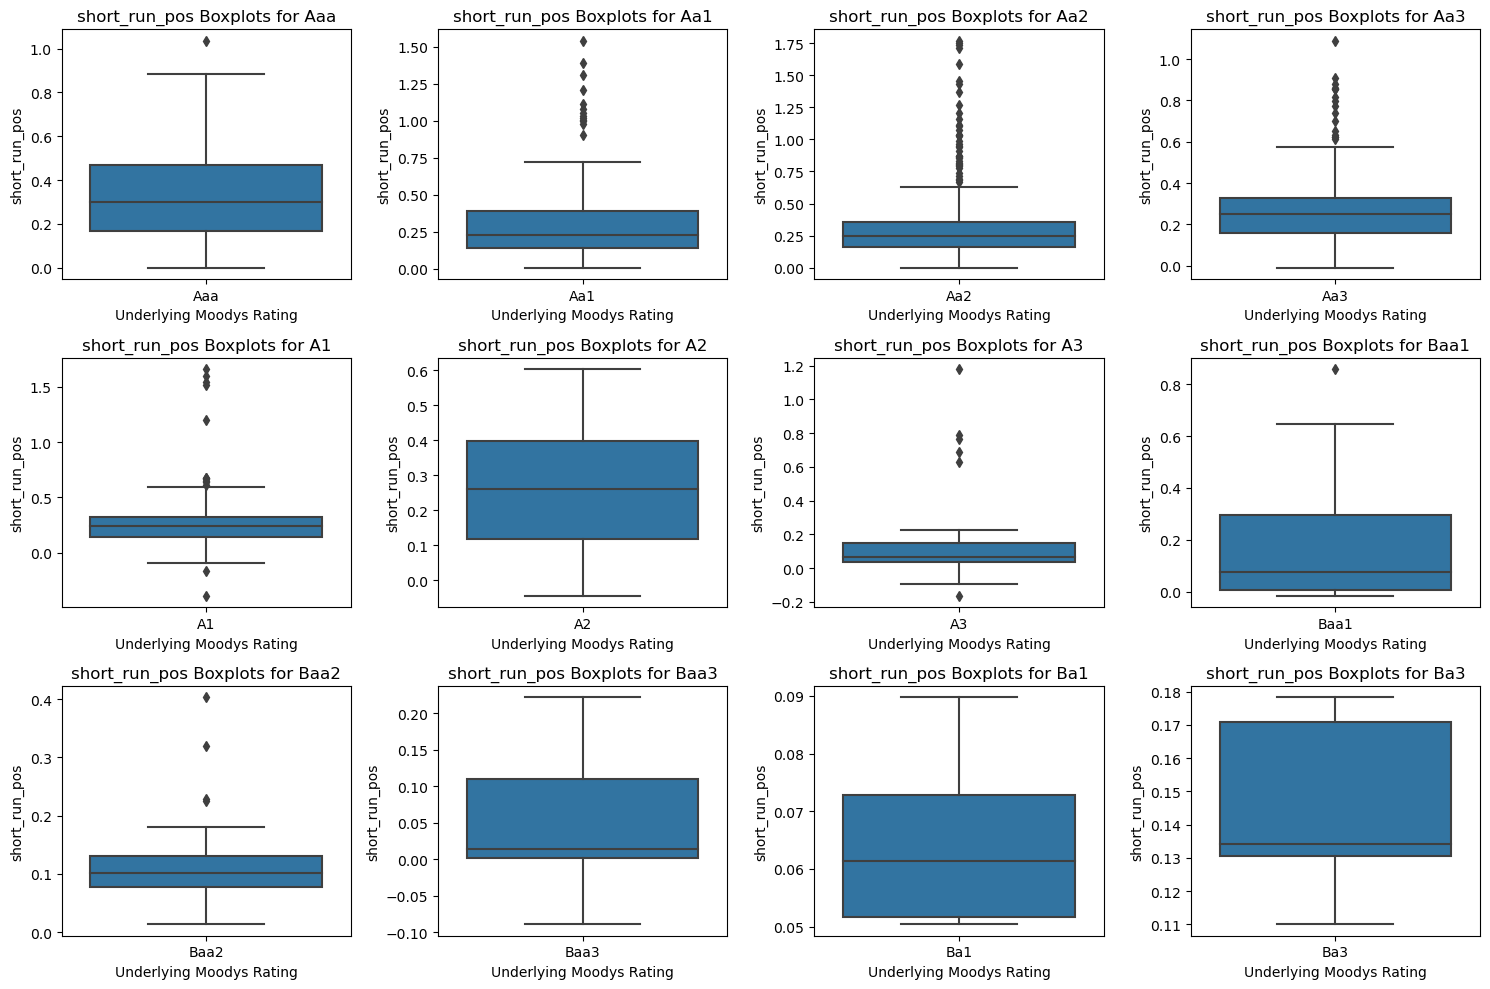

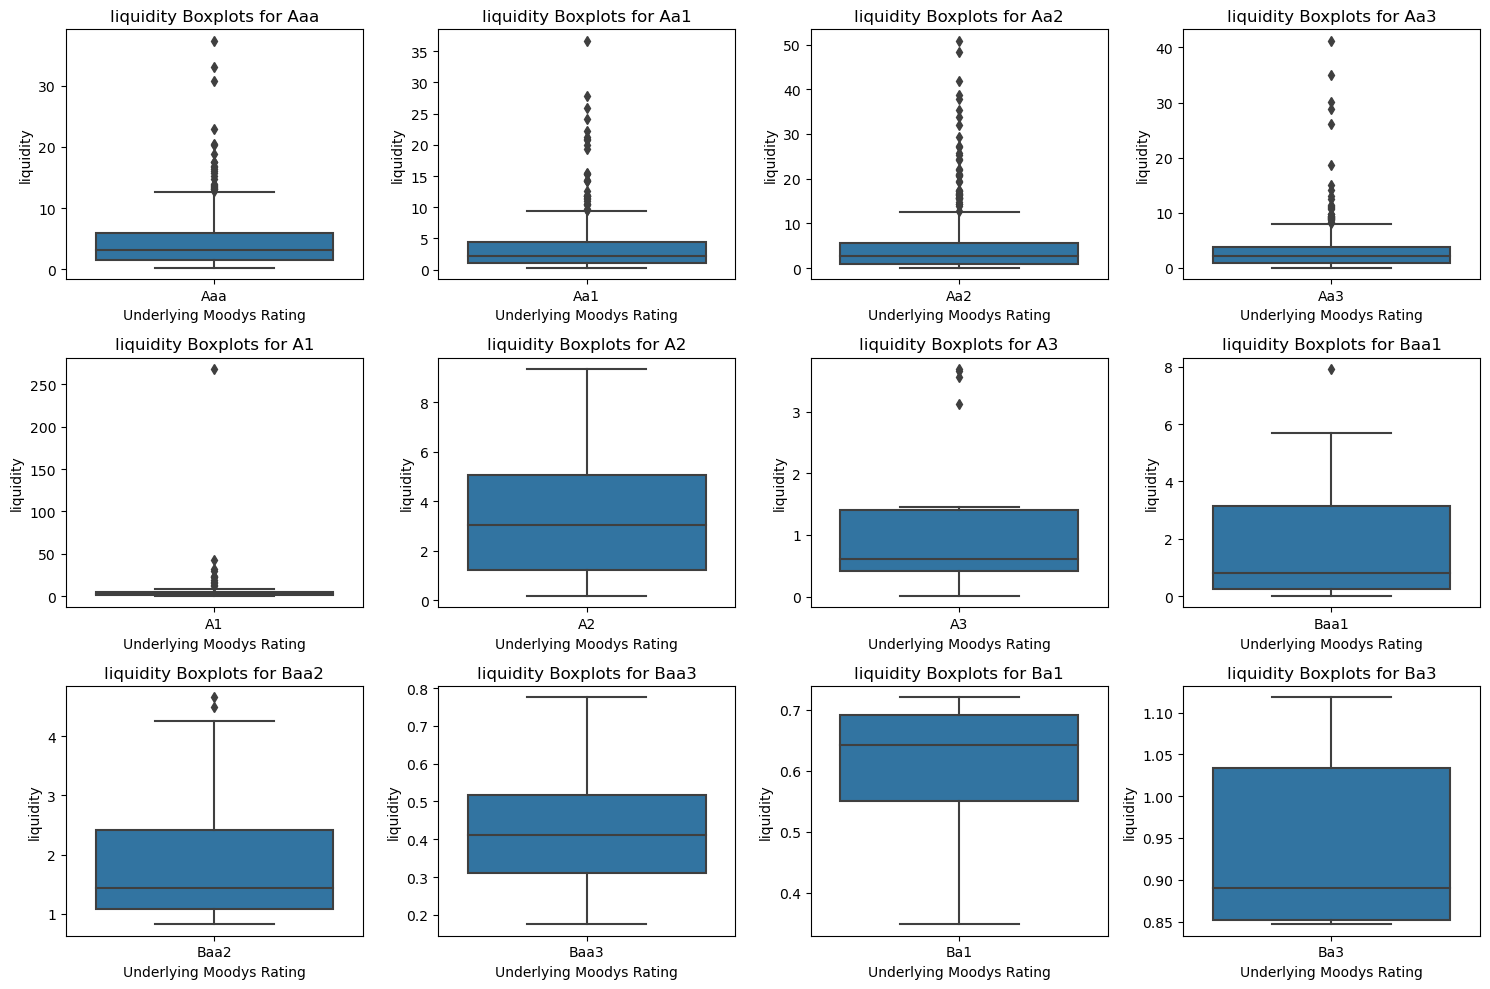

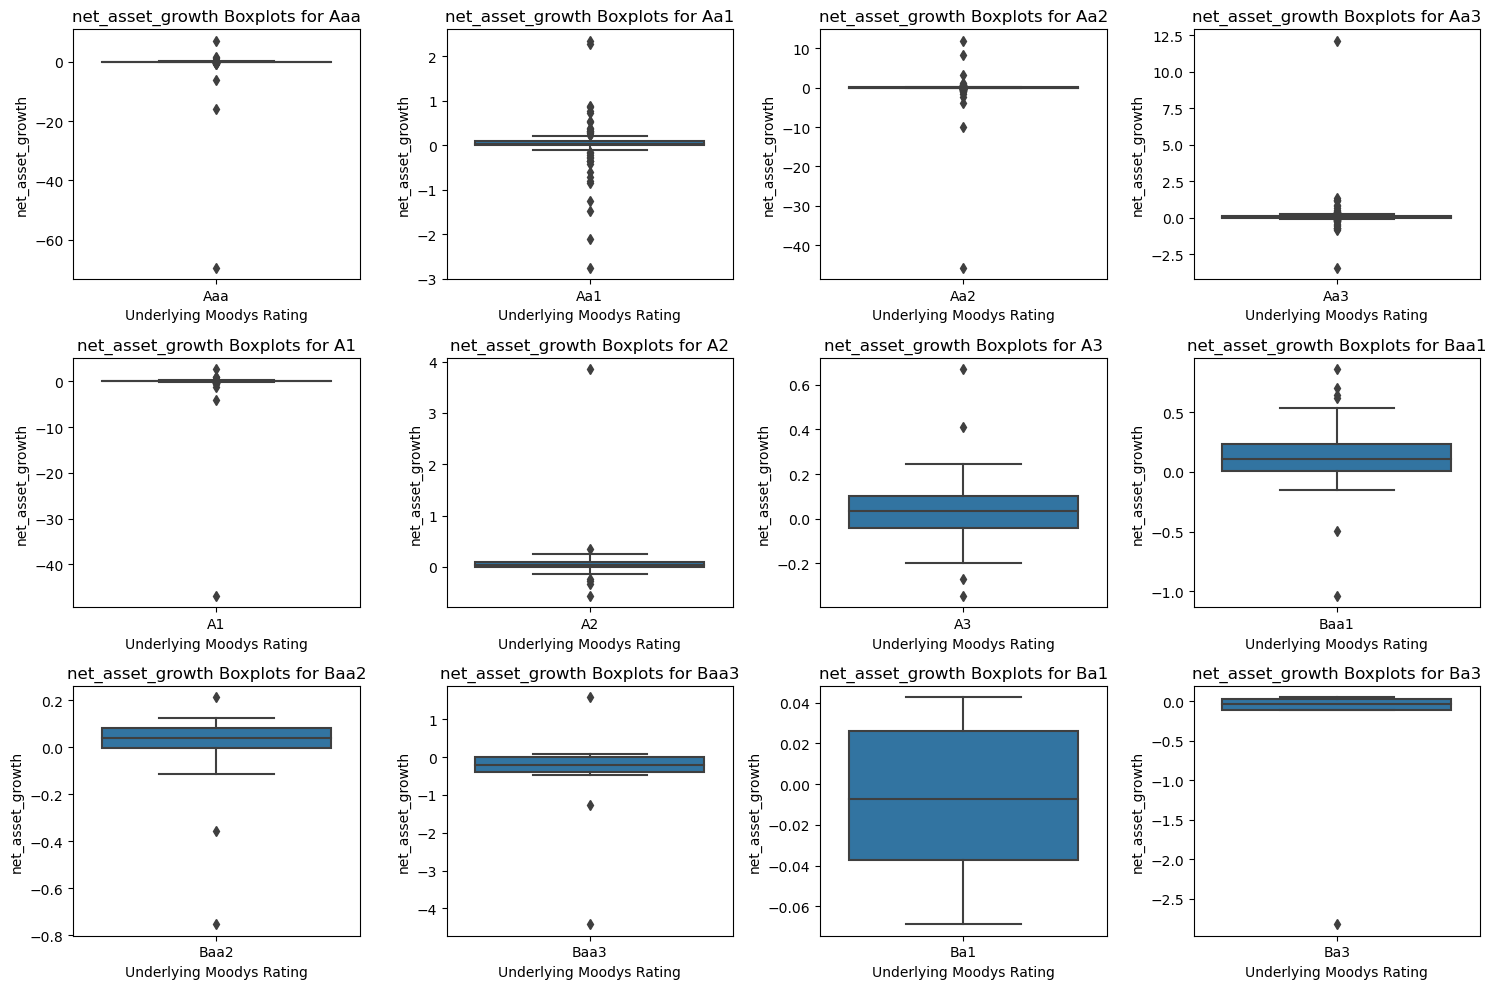

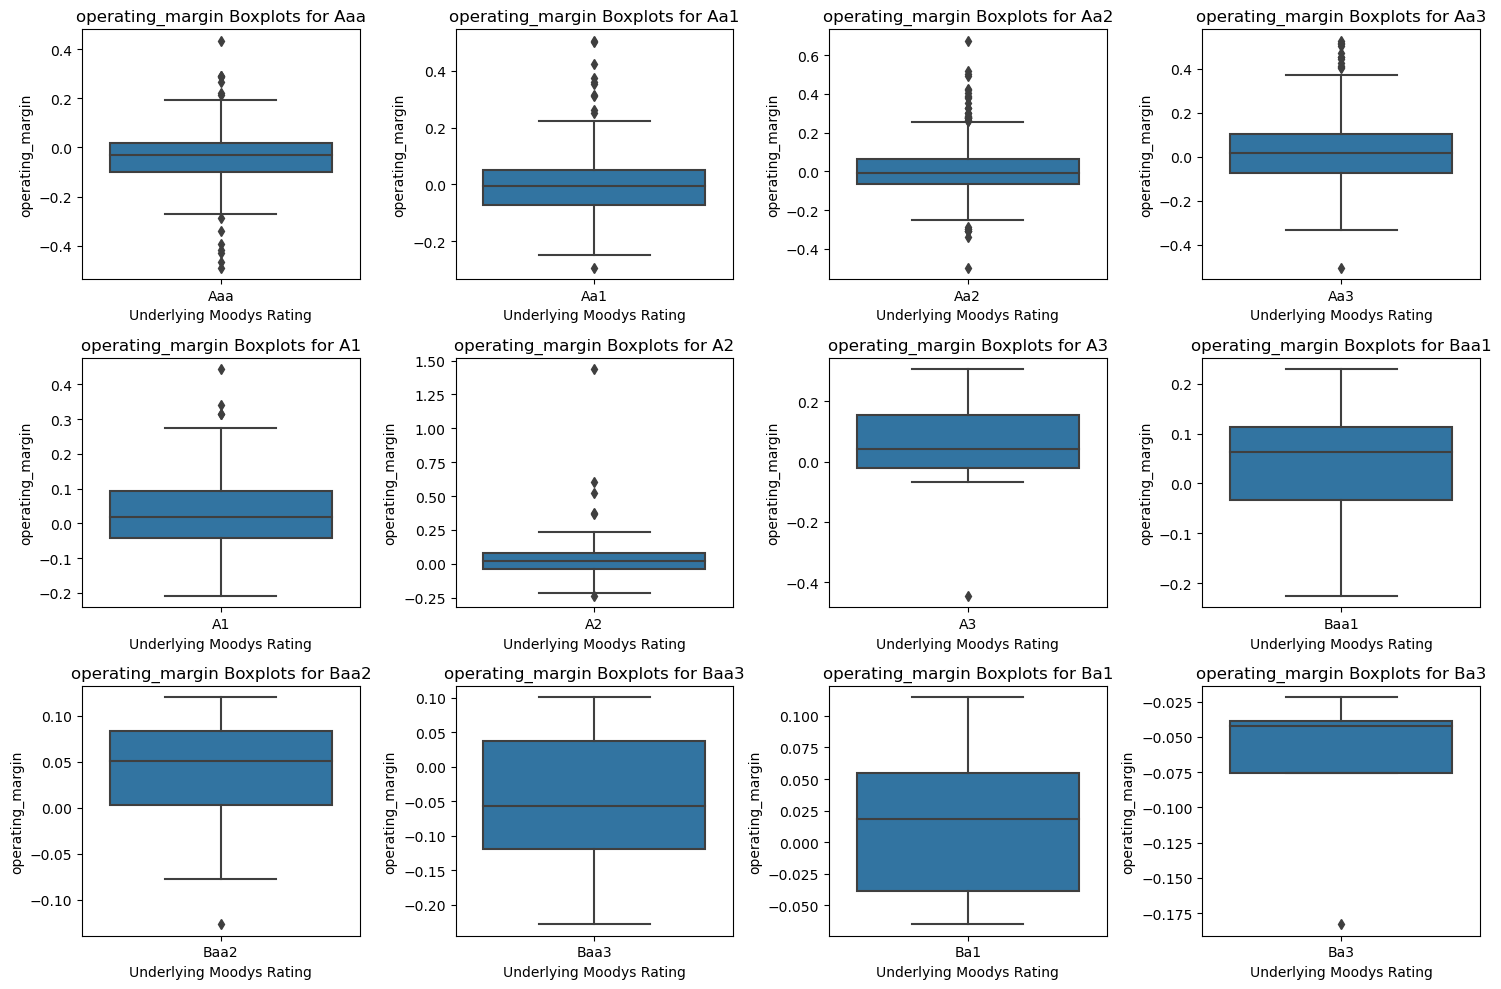

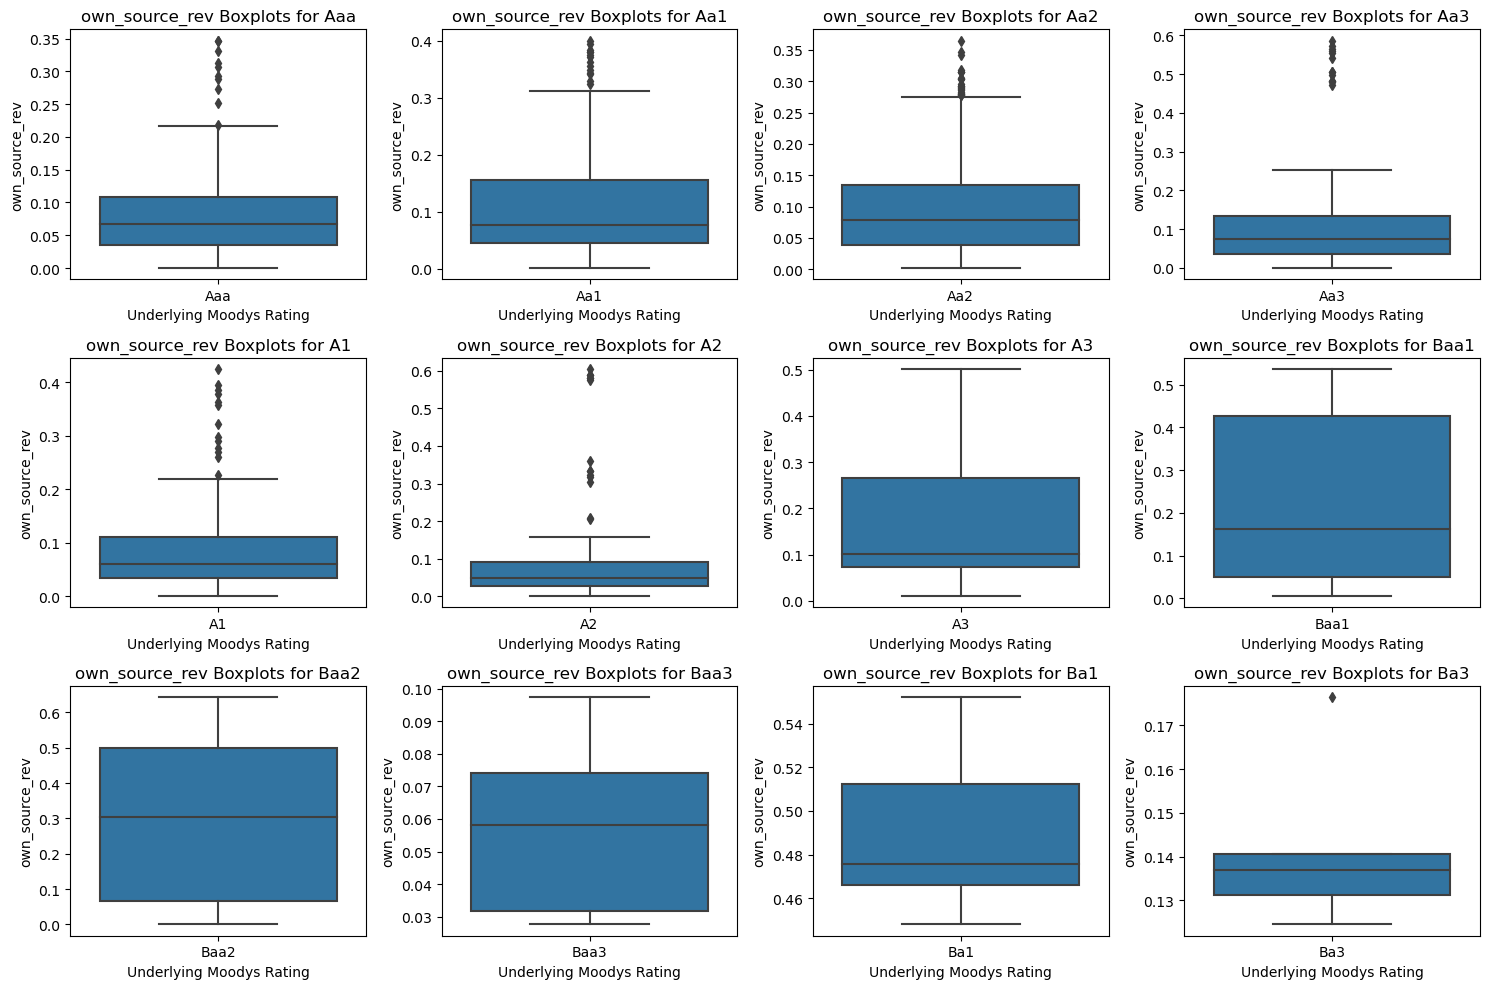

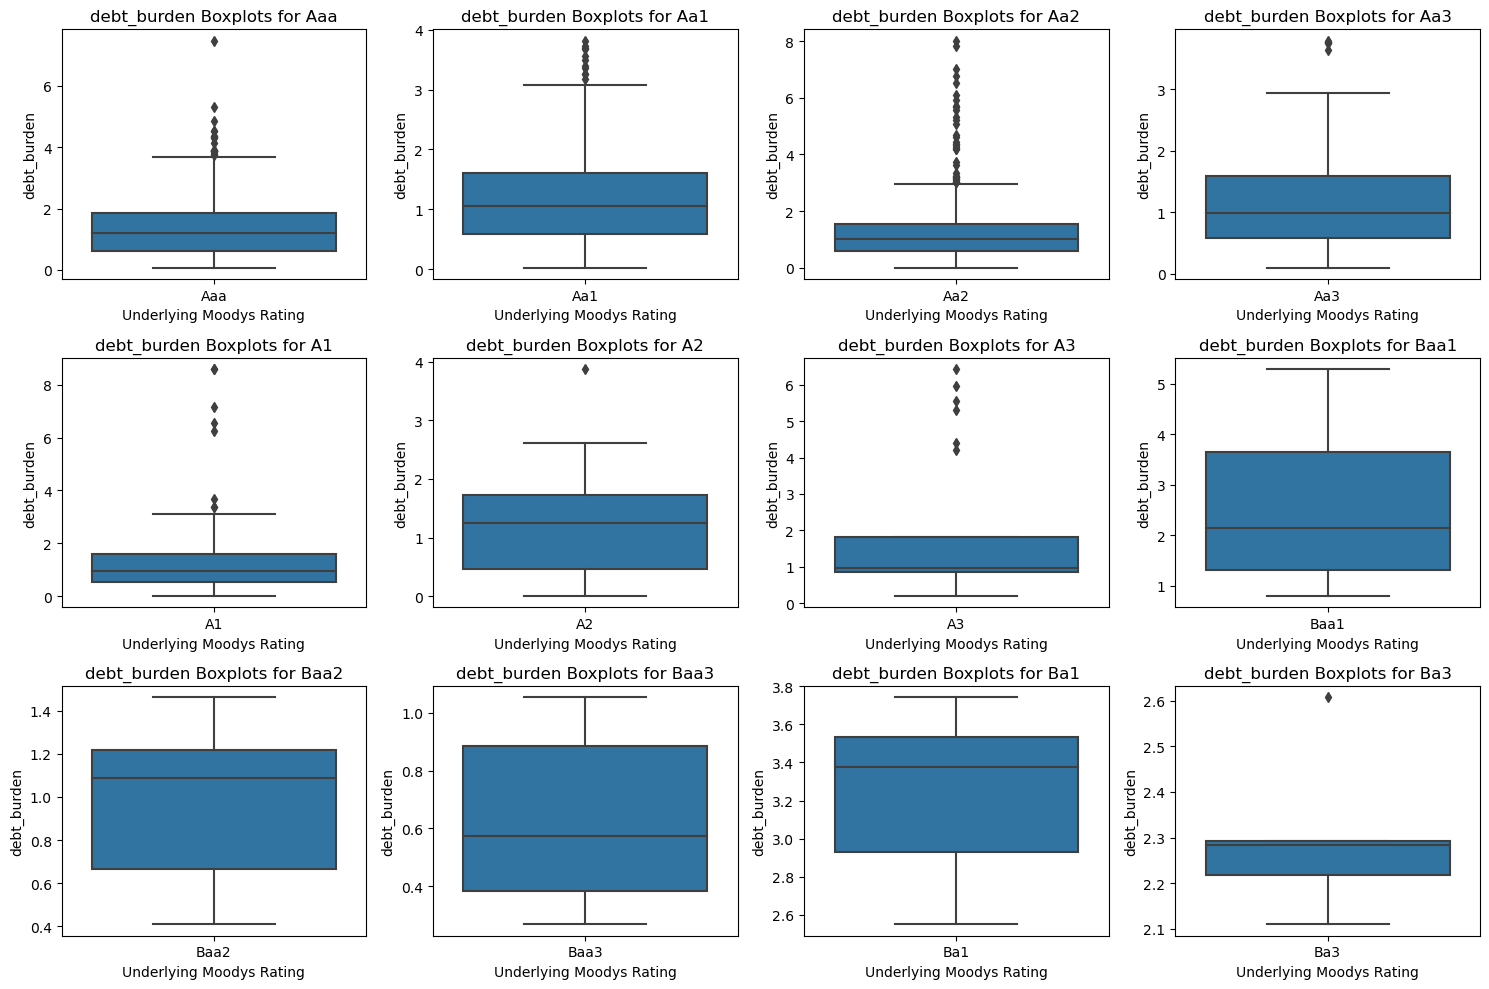

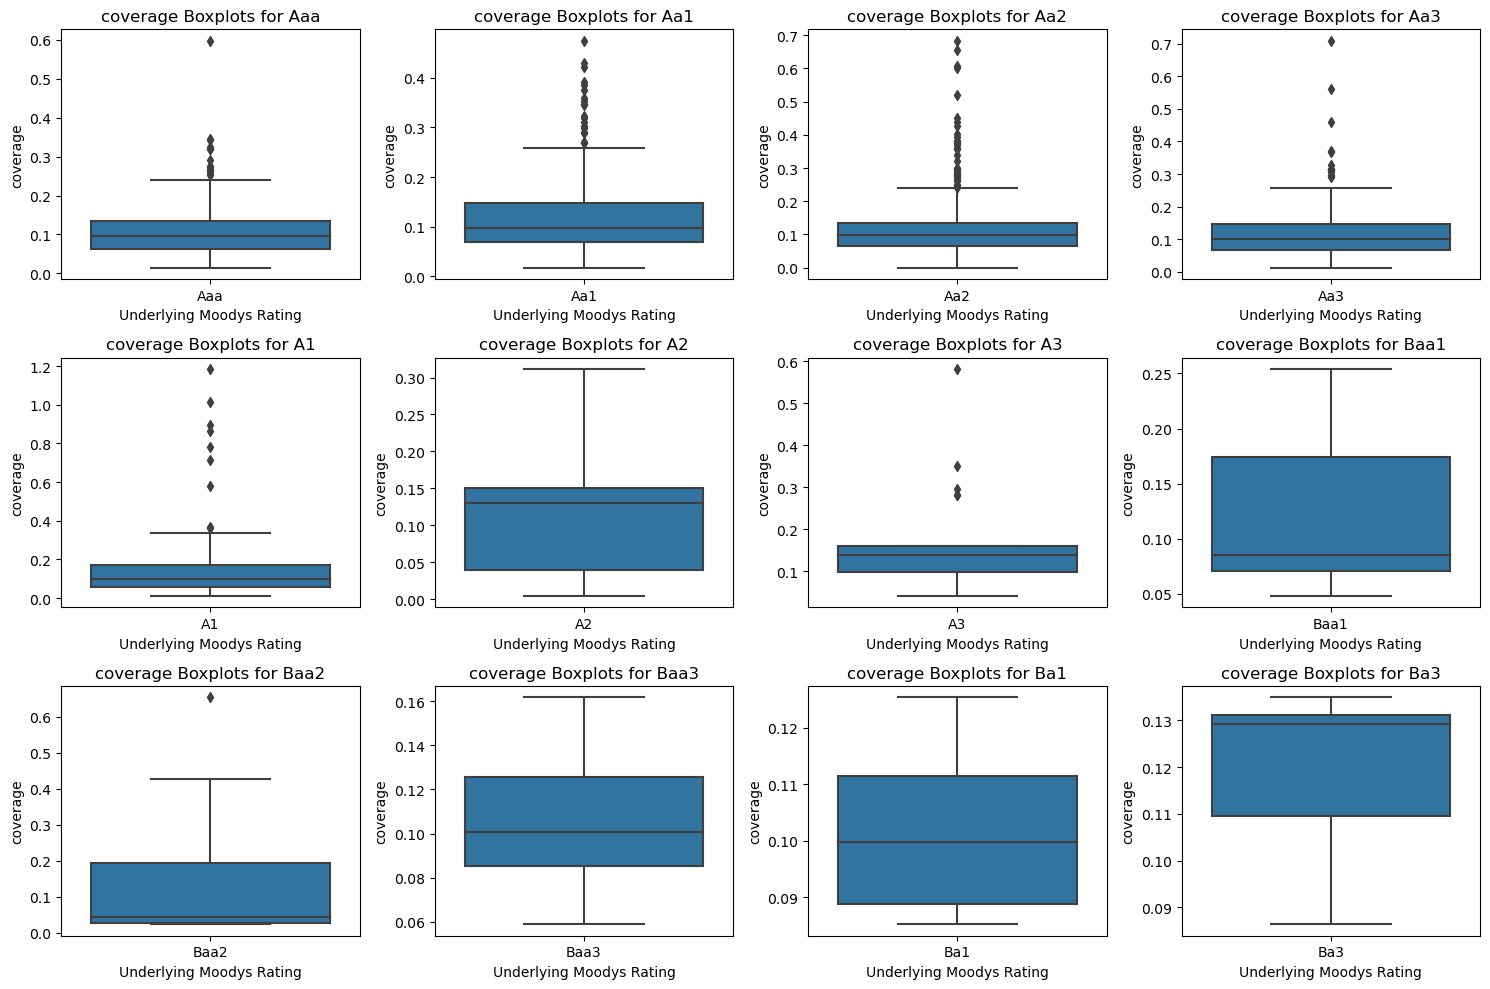

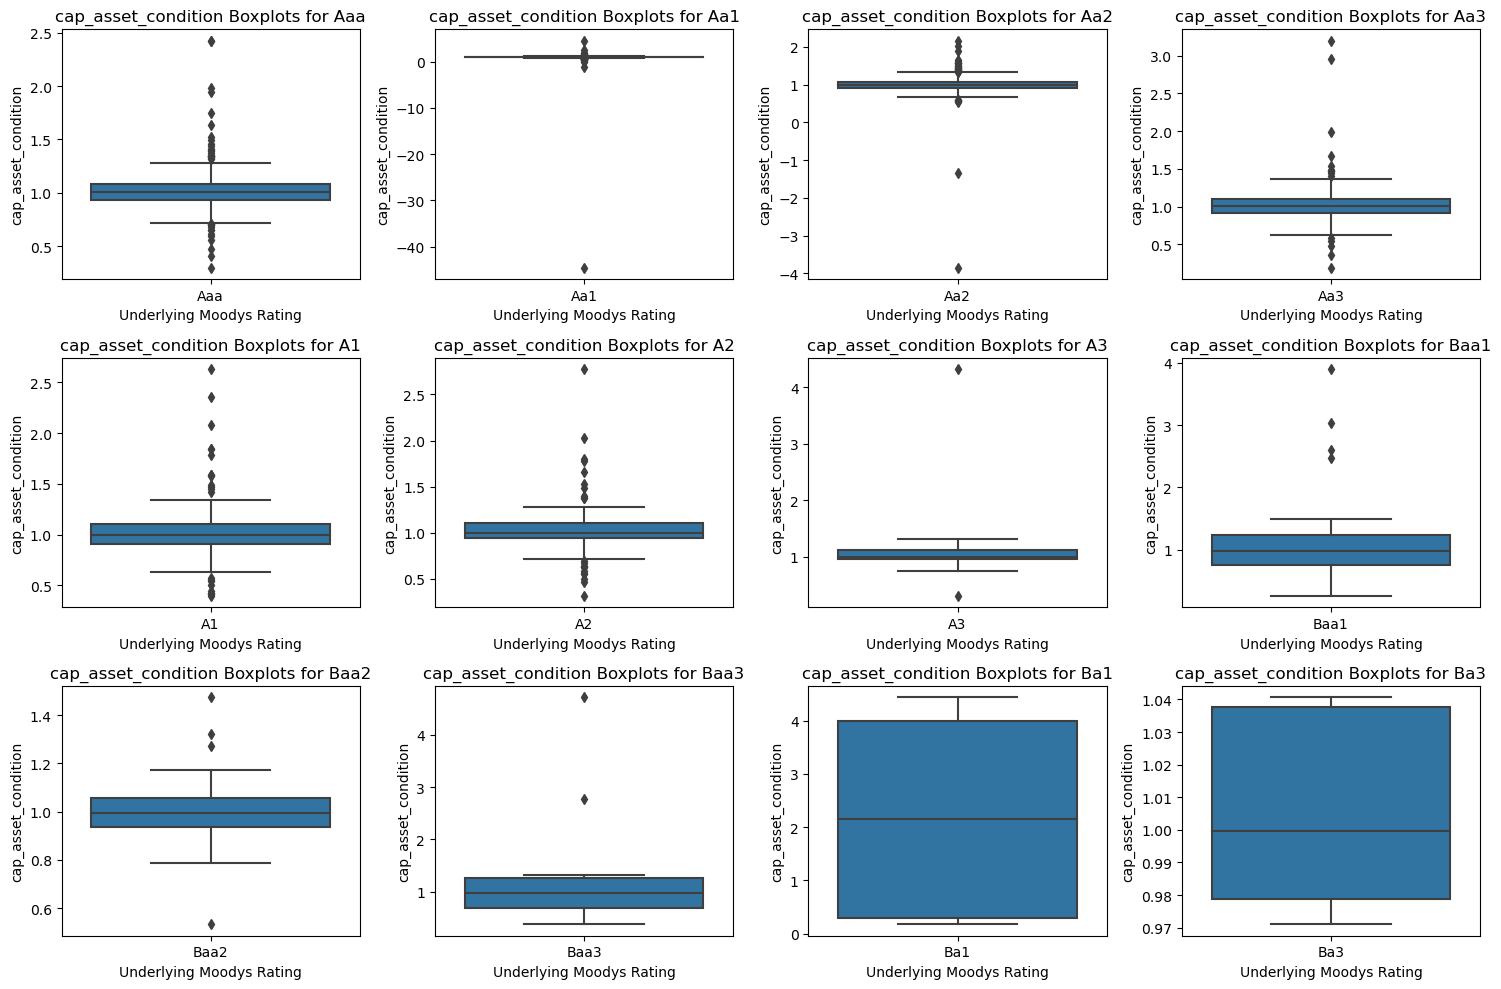

In [11]:
rating_order = ["Aaa", "Aa1", "Aa2", "Aa3", "A1", "A2", "A3", "Baa1", "Baa2", "Baa3", "Ba1", "Ba3"]

unique_ratings = data["Underlying Moodys Rating"].unique()
unique_ratings = sorted(unique_ratings, key=lambda x: rating_order.index(x))

num_rows = 3
num_cols = 4

# List of predictors
predictors = ["short_run_pos", "liquidity", 'net_asset_growth', 
              "operating_margin", "own_source_rev", "debt_burden", "coverage", 
              "cap_asset_condition"]

# Iterate through each predictor
for predictor in predictors:
    # Create subplots for each unique rating
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

    # Flatten the 2D array of axes for easier indexing
    axes = axes.flatten()

    # Iterate through unique ratings
    for i, rating in enumerate(unique_ratings):
        # Determine the subplot position
        row = i // num_cols
        col = i % num_cols

        # Filter data for the current rating and predictor
        filtered_data = data[data["Underlying Moodys Rating"] == rating]

        # Create a boxplot for the current rating and predictor
        sns.boxplot(x="Underlying Moodys Rating", y=predictor, data=filtered_data, ax=axes[i])
        axes[i].set_title(f"{predictor} Boxplots for {rating}")

    # Remove any empty subplots if there are fewer than 12 unique ratings
    for i in range(len(unique_ratings), num_rows * num_cols):
        fig.delaxes(axes[i])

    # Adjust layout and save the figure as an image
    plt.tight_layout()
    plt.savefig(f'boxplots_by_rating_and_{predictor}.png')

    # Show the plots
    # plt.show()


In [19]:
# List of predictors
predictors = ["short_run_pos", "liquidity", 'net_asset_growth', 
              "operating_margin", "own_source_rev", "debt_burden", "coverage", 
              "cap_asset_condition"]


# Specify the z-score threshold for considering an observation as an outlier
total_z_score_threshold = 7

# Calculate the z-scores for each predictor
z_scores = pd.DataFrame()
for predictor in predictors:
    z_scores[predictor + '_z_score'] = data.groupby(
        "Underlying Moodys Rating"
        )[predictor].transform(lambda x: stats.zscore(x))

# Sum the z-scores for each observation
z_scores['total_z_score'] = z_scores.sum(axis=1)

# Identify outliers based on the total z-score threshold
outliers = data[z_scores['total_z_score'] >= total_z_score_threshold]

# Display or further analyze the outliers
print(f"Observations with outliers across multiple predictors:\n{outliers}\n")

Observations with outliers across multiple predictors:
                      Credit Name State  sale_year Underlying Moodys Rating  \
6255                   Waxahachie    TX       2005                       A2   
1041                       Celina    TX       2007                     Baa1   
1603                      Del Rio    TX       2007                       A3   
1229                     Cleburne    TX       2008                       A2   
4882                  Port Arthur    TX       2011                      Aa3   
4886                  Port Arthur    TX       2011                      Aa3   
2187                     Florence    KY       2013                      Aa2   
2188                     Florence    KY       2013                      Aa2   
2189                     Florence    KY       2013                      Aa2   
595   Bloomfield Charter Township    MI       2016                      Aaa   
596   Bloomfield Charter Township    MI       2016                      Aaa 

In [13]:
selected_row = data[
    (data["Credit Name"] == "Cheektowaga Town") & (data["sale_year"] == 2023) & (data["Fiscal Year End"] == "2016-12-31")
    ]
selected_row

,Credit Name,State,sale_year,Underlying Moodys Rating,Fiscal Year End,Cash & Short-Term Investments (GF),Deferred Rev (GF),Total Liabilities (GF),Unassigned Fund Balance (GF),Total Fund Balance (GF),General Fund Rev,General Fund Exp,Total Taxable Assessed Value,Total Assessed Value,Current Debt Service (all Gov funds),Current Portion GO Debt (Gov),Current Portion Long-Term Debt (Gov),Short-Term Debt (Gov),Long-Term Debt (Gov),"Invested in Capital Assets, net of related debt (Gov)",Total Restricted Net Assets (Gov),Unrestricted Net Assets (Gov),Total Net Assets (Gov),Operating Grants & Contributions (Gov),Total Rev (Gov),Total Exp (Gov),Revenue Over Expense (Gov),Change in Net Assets (Gov),Total Pension Liability (EOY),Total Pension Expense,Population,Total Primary Government Expenses,moodys_ratings_num,short_run_pos,liquidity,net_assets_prev_year,net_asset_growth,operating_margin,own_source_rev,debt_burden,coverage,net_invest_prev_year,cap_asset_condition
1111,Cheektowaga Town,NY,2023,Aa3,2016-12-31,18811,310.00,10344,7598.00,20034,46603.00,51031.00,4599536.00,4599536.00,3667.00,2947.00,3426.00,0.00,50236.00,70569.00,16770.00,-66023.00,21316.00,2603.00,86980.00,111653.00,-24673.00,-24223.00,0.00,0.00,86754,111653.00,9,0.16,1.87,-1998.00,12.12,0.28,0.03,0.58,0.03,72536.00,0.97


In [14]:
selected_row = selected_row.iloc[0]

# Calculate medians for each column in the "Aa3" group
medians_Aa3 = data[data['Underlying Moodys Rating'] == 'Aa3'].median()

# Create a DataFrame to compare the selected row with the medians
comparison_df = pd.DataFrame({'Selected Row': selected_row, 'Medians (Aa3 Group)': medians_Aa3})

# Display the comparison DataFrame
comparison_df

C:\Users\RichardCampo\AppData\Local\Temp\ipykernel_39572\715126424.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  medians_Aa3 = data[data['Underlying Moodys Rating'] == 'Aa3'].median()
C:\Users\RichardCampo\AppData\Local\Temp\ipykernel_39572\715126424.py:4: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  medians_Aa3 = data[data['Underlying Moodys Rating'] == 'Aa3'].median()


,Selected Row,Medians (Aa3 Group)
Cash & Short-Term Investments (GF),18811,15314.00
Change in Net Assets (Gov),-24223.00,5076.50
Credit Name,Cheektowaga Town,NaN
Current Debt Service (all Gov funds),3667.00,7355.50
Current Portion GO Debt (Gov),2947.00,3466.50
Current Portion Long-Term Debt (Gov),3426.00,5079.50
Deferred Rev (GF),310.00,54.00
Fiscal Year End,2016-12-31 00:00:00,NaN
General Fund Exp,51031.00,48425.50
General Fund Rev,46603.00,51091.00


In [15]:
data.loc[data["Underlying Moodys Rating"] == "Aa3", predictors].describe()

,short_run_pos,liquidity,net_asset_growth,operating_margin,own_source_rev,debt_burden,coverage,cap_asset_condition
count,290.00,290.00,290.00,290.00,290.00,290.00,290.00,290.00
mean,0.26,3.46,0.09,0.03,0.10,1.11,0.12,1.03
std,0.18,4.87,0.77,0.16,0.11,0.71,0.08,0.25
min,-0.01,0.00,-3.44,-0.50,0.00,0.10,0.01,0.19
25%,0.16,0.85,-0.00,-0.08,0.04,0.58,0.07,0.91
50%,0.25,2.11,0.04,0.02,0.08,0.99,0.10,1.01
75%,0.33,3.77,0.10,0.10,0.13,1.58,0.15,1.10
max,1.09,41.23,12.12,0.53,0.59,3.80,0.71,3.20


In [16]:
selected_row = data[(data["Credit Name"] == "Menomonee Falls Village") & (data["sale_year"] == 2023) & (data["Fiscal Year End"] == "2019-12-31")]

In [17]:
# Choose the row you want to compare (e.g., the first row)
selected_row = selected_row.iloc[0]

# Calculate medians for each column in the "Aa3" group
medians_Aa3 = data[data['Underlying Moodys Rating'] == 'Aa2'].median()

# Create a DataFrame to compare the selected row with the medians
comparison_df = pd.DataFrame({'Selected Row': selected_row, 'Medians (Aa2 Group)': medians_Aa3})

# Display the comparison DataFrame
comparison_df

C:\Users\RichardCampo\AppData\Local\Temp\ipykernel_39572\831445821.py:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  medians_Aa3 = data[data['Underlying Moodys Rating'] == 'Aa2'].median()
C:\Users\RichardCampo\AppData\Local\Temp\ipykernel_39572\831445821.py:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  medians_Aa3 = data[data['Underlying Moodys Rating'] == 'Aa2'].median()


,Selected Row,Medians (Aa2 Group)
Cash & Short-Term Investments (GF),21025,22363.00
Change in Net Assets (Gov),1330.00,6878.00
Credit Name,Menomonee Falls Village,NaN
Current Debt Service (all Gov funds),31737.00,9174.00
Current Portion GO Debt (Gov),6948.00,4760.00
Current Portion Long-Term Debt (Gov),6948.00,6351.00
Deferred Rev (GF),0.00,6.00
Fiscal Year End,2019-12-31 00:00:00,NaN
General Fund Exp,25002.00,58298.00
General Fund Rev,26781.00,61337.00


In [20]:
data.loc[data["Underlying Moodys Rating"] == "Aa2", predictors].describe()

,short_run_pos,liquidity,net_asset_growth,operating_margin,own_source_rev,debt_burden,coverage,cap_asset_condition
count,455.00,455.00,455.00,455.00,455.00,455.00,455.00,455.00
mean,0.32,4.91,-0.04,0.01,0.10,1.32,0.12,1.00
std,0.27,6.98,2.32,0.13,0.08,1.21,0.09,0.31
min,0.00,0.08,-45.77,-0.50,0.00,0.00,0.00,-3.85
25%,0.16,0.99,0.00,-0.07,0.04,0.59,0.07,0.92
50%,0.25,2.66,0.04,-0.01,0.08,1.01,0.10,1.00
75%,0.36,5.63,0.10,0.06,0.13,1.56,0.14,1.08
max,1.77,50.88,11.95,0.67,0.36,8.02,0.68,2.17


In [33]:
selected_row = data[(data["Credit Name"] == "Minot") & (data["sale_year"] == 2022) & (data["Fiscal Year End"] == "2020-12-31")]

In [34]:
# Choose the row you want to compare (e.g., the first row)
selected_row = selected_row.iloc[0]

# Calculate medians for each column in the "Aa3" group
medians_Aa2 = data[data['Underlying Moodys Rating'] == 'Aa2'].median()

# Create a DataFrame to compare the selected row with the medians
comparison_df = pd.DataFrame({'Selected Row': selected_row, 'Medians (Aa2 Group)': medians_Aa2})

# Display the comparison DataFrame
comparison_df

C:\Users\RichardCampo\AppData\Local\Temp\ipykernel_39572\2412696368.py:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  medians_Aa3 = data[data['Underlying Moodys Rating'] == 'Aa2'].median()
C:\Users\RichardCampo\AppData\Local\Temp\ipykernel_39572\2412696368.py:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  medians_Aa3 = data[data['Underlying Moodys Rating'] == 'Aa2'].median()


,Selected Row,Medians (Aa3 Group)
Cash & Short-Term Investments (GF),44295,22363.00
Change in Net Assets (Gov),7808.00,6878.00
Credit Name,Minot,NaN
Current Debt Service (all Gov funds),4999.00,9174.00
Current Portion GO Debt (Gov),3931.00,4760.00
Current Portion Long-Term Debt (Gov),4523.00,6351.00
Deferred Rev (GF),19.00,6.00
Fiscal Year End,2020-12-31 00:00:00,NaN
General Fund Exp,45889.00,58298.00
General Fund Rev,40843.00,61337.00


In [42]:
data.loc[data["Underlying Moodys Rating"] == "Aa2", predictors].describe()

,short_run_pos,liquidity,net_asset_growth,operating_margin,own_source_rev,debt_burden,coverage,cap_asset_condition
count,455.00,455.00,455.00,455.00,455.00,455.00,455.00,455.00
mean,0.32,4.91,-0.04,0.01,0.10,1.32,0.12,1.00
std,0.27,6.98,2.32,0.13,0.08,1.21,0.09,0.31
min,0.00,0.08,-45.77,-0.50,0.00,0.00,0.00,-3.85
25%,0.16,0.99,0.00,-0.07,0.04,0.59,0.07,0.92
50%,0.25,2.66,0.04,-0.01,0.08,1.01,0.10,1.00
75%,0.36,5.63,0.10,0.06,0.13,1.56,0.14,1.08
max,1.77,50.88,11.95,0.67,0.36,8.02,0.68,2.17


In [40]:
selected_row = data[(data["Credit Name"] == "Moorhead") & (data["sale_year"] == 2022) & (data["Fiscal Year End"] == "2019-12-31")]

In [41]:
# Choose the row you want to compare (e.g., the first row)
selected_row = selected_row.iloc[0]

# Calculate medians for each column in the "Aa3" group
medians_Aa3 = data[data['Underlying Moodys Rating'] == 'Aa3'].median()

# Create a DataFrame to compare the selected row with the medians
comparison_df = pd.DataFrame({'Selected Row': selected_row, 'Medians (Aa3 Group)': medians_Aa3})

# Display the comparison DataFrame
comparison_df

C:\Users\RichardCampo\AppData\Local\Temp\ipykernel_39572\289465140.py:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  medians_Aa3 = data[data['Underlying Moodys Rating'] == 'Aa3'].median()
C:\Users\RichardCampo\AppData\Local\Temp\ipykernel_39572\289465140.py:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  medians_Aa3 = data[data['Underlying Moodys Rating'] == 'Aa3'].median()


,Selected Row,Medians (Aa3 Group)
Cash & Short-Term Investments (GF),11640,15314.00
Change in Net Assets (Gov),13890.00,5076.50
Credit Name,Moorhead,NaN
Current Debt Service (all Gov funds),17183.00,7355.50
Current Portion GO Debt (Gov),20058.00,3466.50
Current Portion Long-Term Debt (Gov),20154.00,5079.50
Deferred Rev (GF),0.00,54.00
Fiscal Year End,2019-12-31 00:00:00,NaN
General Fund Exp,27316.00,48425.50
General Fund Rev,20151.00,51091.00


In [47]:
selected_row = data[(data["Credit Name"] == "El Mirage") & (data["sale_year"] == 2022) & (data["Fiscal Year End"] == "2020-06-30")]

In [48]:
# Choose the row you want to compare (e.g., the first row)
selected_row = selected_row.iloc[0]

# Calculate medians for each column in the "Aa3" group
medians_Aa2 = data[data['Underlying Moodys Rating'] == 'Aa2'].median()

# Create a DataFrame to compare the selected row with the medians
comparison_df = pd.DataFrame({'Selected Row': selected_row, 'Medians (Aa2 Group)': medians_Aa2})

# Display the comparison DataFrame
comparison_df

C:\Users\RichardCampo\AppData\Local\Temp\ipykernel_39572\2582848929.py:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  medians_Aa2 = data[data['Underlying Moodys Rating'] == 'Aa2'].median()
C:\Users\RichardCampo\AppData\Local\Temp\ipykernel_39572\2582848929.py:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  medians_Aa2 = data[data['Underlying Moodys Rating'] == 'Aa2'].median()


,Selected Row,Medians (Aa2 Group)
Cash & Short-Term Investments (GF),30188,22363.00
Change in Net Assets (Gov),12244.00,6878.00
Credit Name,El Mirage,NaN
Current Debt Service (all Gov funds),11794.00,9174.00
Current Portion GO Debt (Gov),1230.00,4760.00
Current Portion Long-Term Debt (Gov),1230.00,6351.00
Deferred Rev (GF),83.00,6.00
Fiscal Year End,2020-06-30 00:00:00,NaN
General Fund Exp,21852.00,58298.00
General Fund Rev,27796.00,61337.00


In [49]:
data.loc[data["Underlying Moodys Rating"] == "Aa2", predictors].describe()

,short_run_pos,liquidity,net_asset_growth,operating_margin,own_source_rev,debt_burden,coverage,cap_asset_condition
count,455.00,455.00,455.00,455.00,455.00,455.00,455.00,455.00
mean,0.32,4.91,-0.04,0.01,0.10,1.32,0.12,1.00
std,0.27,6.98,2.32,0.13,0.08,1.21,0.09,0.31
min,0.00,0.08,-45.77,-0.50,0.00,0.00,0.00,-3.85
25%,0.16,0.99,0.00,-0.07,0.04,0.59,0.07,0.92
50%,0.25,2.66,0.04,-0.01,0.08,1.01,0.10,1.00
75%,0.36,5.63,0.10,0.06,0.13,1.56,0.14,1.08
max,1.77,50.88,11.95,0.67,0.36,8.02,0.68,2.17


In [62]:
selected_row = data[(data["State"] == "ND")]
selected_row

,Credit Name,State,sale_year,Underlying Moodys Rating,Fiscal Year End,Cash & Short-Term Investments (GF),Deferred Rev (GF),Total Liabilities (GF),Unassigned Fund Balance (GF),Total Fund Balance (GF),General Fund Rev,General Fund Exp,Total Taxable Assessed Value,Total Assessed Value,Current Debt Service (all Gov funds),Current Portion GO Debt (Gov),Current Portion Long-Term Debt (Gov),Short-Term Debt (Gov),Long-Term Debt (Gov),"Invested in Capital Assets, net of related debt (Gov)",Total Restricted Net Assets (Gov),Unrestricted Net Assets (Gov),Total Net Assets (Gov),Operating Grants & Contributions (Gov),Total Rev (Gov),Total Exp (Gov),Revenue Over Expense (Gov),Change in Net Assets (Gov),Total Pension Liability (EOY),Total Pension Expense,Population,Total Primary Government Expenses,moodys_ratings_num,short_run_pos,liquidity,net_assets_prev_year,net_asset_growth,operating_margin,own_source_rev,debt_burden,coverage,net_invest_prev_year,cap_asset_condition
6322,West Fargo,ND,2018,A1,2020-12-31,21737,0.00,1335,26604.00,26604,22169.00,19534.00,187773.00,2024316.00,59659.00,16375.00,17632.00,0.00,331989.00,165429.00,71337.00,-60689.00,176077.00,1780.00,47104.00,50327.00,-3223.00,30410.00,0.00,0.00,38626,74065.00,8,1.20,16.28,145667.00,0.21,0.07,0.04,8.59,1.19,112435.00,1.47
6323,West Fargo,ND,2018,A1,2016-12-31,7218,0.00,171,22171.00,22456,13892.00,12975.00,140295.00,1511395.00,23898.00,14130.00,14350.00,0.00,227682.00,122538.00,39978.00,-23564.00,138952.00,5850.00,32208.00,27673.00,4535.00,52700.00,0.00,0.00,34666,45874.00,8,1.60,42.21,176077.00,0.30,-0.14,0.18,6.57,0.86,165429.00,0.74
6324,West Fargo,ND,2018,A1,2017-12-31,22175,0.00,687,22238.00,22238,14448.00,14638.00,155988.00,1679823.00,25504.00,17320.00,18116.00,0.00,256048.00,145448.00,47804.00,-19258.00,173994.00,5048.00,32779.00,35714.00,-2935.00,37086.00,0.00,0.00,35716,55519.00,8,1.54,32.28,138952.00,0.27,0.09,0.15,7.17,0.71,122538.00,1.19
6325,West Fargo,ND,2018,A1,2015-12-31,19836,0.00,74,20375.00,20375,13472.00,10529.00,113738.00,1222455.00,20415.00,14875.00,15090.00,0.00,209530.00,57545.00,29017.00,5.00,86567.00,2931.00,30224.00,26168.00,4056.00,16037.00,0.00,0.00,33452,42290.00,8,1.51,268.05,173994.00,0.09,-0.13,0.10,6.26,0.78,145448.00,0.40
6326,West Fargo,ND,2018,A1,2018-12-31,24748,0.00,842,24774.00,24774,14936.00,15789.00,165741.00,1784528.00,37740.00,17270.00,18163.00,0.00,312192.00,119882.00,53689.00,17883.00,191454.00,2600.00,34723.00,42182.00,-7459.00,18074.00,0.00,0.00,36370,62578.00,8,1.66,29.39,86567.00,0.21,0.21,0.07,8.58,0.89,57545.00,2.08
583,Bismarck,ND,2021,Aa1,2015-12-31,37402,84.00,1533,31714.00,38596,30722.00,35807.00,290448.00,3105756.00,14006.00,14415.00,14415.00,0.00,104740.00,197952.00,25205.00,173103.00,396260.00,11068.00,73063.00,71849.00,1214.00,42659.00,42556.00,-2001.00,71466,121265.00,11,1.03,25.81,463036.00,0.09,-0.02,0.15,1.47,0.19,238972.00,0.83
584,Bismarck,ND,2021,Aa1,2016-12-31,39906,0.00,2602,32800.00,40327,32642.00,39734.00,324137.00,3464381.00,17664.00,15755.00,15755.00,0.00,109896.00,218218.00,31076.00,181422.00,430716.00,13162.00,73872.00,74560.00,-688.00,31912.00,44460.00,270.00,72602,125624.00,11,1.00,15.34,396260.00,0.08,0.01,0.18,1.51,0.24,197952.00,1.10
585,Bismarck,ND,2021,Aa1,2017-12-31,40372,0.00,1822,34269.00,40675,32607.00,41476.00,350958.00,3748608.00,19167.00,16170.00,16170.00,0.00,114788.00,225241.00,49168.00,170563.00,444972.00,11752.00,73997.00,80474.00,-6477.00,14256.00,47688.00,-21.00,73211,132321.00,11,1.05,22.16,430716.00,0.03,0.09,0.16,1.57,0.24,218218.00,1.03
586,Bismarck,ND,2021,Aa1,2018-12-31,42955,0.00,2075,36361.00,43956,35631.00,41617.00,376741.00,4012825.00,19948.00,16455.00,16455.00,0.00,113406.00,230739.00,55329.00,166263.00,452331.00,12040.00,74267.00,84393.00,-10126.00,7360.00,49719.00,-1146.00,73422,138254.00,11,1.02,20.70,444972.00,0.02,0.14,0.16,1.54,0.24,225241.00,1.02
587,Bismarck,ND,2021,Aa1,2020-12-31,53481,0.00,2683,32885.00,56274,45640.00,45589.00,394141.00,4197030.00,20310.00,16750.00,